# Utilizing Text Data

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving tmdb_dropna.xlsx to tmdb_dropna.xlsx
User uploaded file "tmdb_dropna.xlsx" with length 1269708 bytes


## Movies Dataset
- https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset
- metadata for movies in MovieLens Dataset

In [ ]:
import pandas as pd

# Loading the Excel file
file_path = 'tmdb_dropna.xlsx'
df = pd.read_excel(file_path)

# Checking the first few rows of the dataframe to understand its structure
df.head()


,Unnamed: 0,title,overview,adult,budget,revenue,runtime,average_rating,count_of_rating,Genre_Action,...,Genre_Romance,Genre_SciFi,Genre_TV,Genre_Thriller,Genre_War,Genre_Western,lnbudget,lnrevenue,lnruntime,lncount_of_rating
0,0,Toy Story,"Led by Woody, Andy's toys live happily in his ...",1,30000000,373554033,81,3.872470,247,0,...,0,0,0,0,0,0,17.216708,19.738573,4.406719,5.513429
1,1,Jumanji,When siblings Judy and Peter discover an encha...,1,65000000,262797249,104,3.401869,107,0,...,0,0,0,0,0,0,17.989898,19.386893,4.653960,4.682131
2,2,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",1,16000000,81452156,127,2.384615,13,0,...,1,0,0,0,0,0,16.588099,18.215526,4.852030,2.639057
3,3,Heat,"Obsessive master thief, Neil McCauley leads a ...",1,60000000,187436818,170,3.884615,104,1,...,0,0,0,1,0,0,17.909855,19.048952,5.141664,4.653960
4,4,Sudden Death,International action superstar Jean Claude Van...,1,35000000,64350171,106,3.150000,20,1,...,0,0,0,1,0,0,17.370859,17.979850,4.672829,3.044522


## Bag of words + N-gram

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Extracting the 'overview' column for bag of words analysis
overviews = df['overview']

# Initializing CountVectorizer for up to 2-grams
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english')

# Fitting the model and transforming the data
X = vectorizer.fit_transform(overviews)

# Creating a DataFrame to display the results
feature_names = vectorizer.get_feature_names_out()
bag_of_words_df = pd.DataFrame(X.toarray(), columns=feature_names)

# Displaying the first few rows of the resulting bag of words DataFrame
bag_of_words_df.head()


,00,00 agent,00 middle,000,000 000,000 50,000 boys,000 buried,000 cash,000 dm,...,zulu,zulu wars,zulus,zulus aided,zuzu,zuzu petals,æon,æon flux,émigré,émigré christina
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### BoW dummy coding
- if you want a bag-of-words dummy rather than count

In [ ]:
bag_of_words_df_dummy = bag_of_words_df.apply(lambda x: (x != 0).astype(int))

# Displaying the first few rows of the resulting bag of words DataFrame
bag_of_words_df_dummy.head()

,00,00 agent,00 middle,000,000 000,000 50,000 boys,000 buried,000 cash,000 dm,...,zulu,zulu wars,zulus,zulus aided,zuzu,zuzu petals,æon,æon flux,émigré,émigré christina
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- let's count what are the top words

In [ ]:
# Summing all rows for each column to find the total frequency of each term
term_frequencies = bag_of_words_df.sum().sort_values(ascending=False)

# Extracting the top terms
top_terms = term_frequencies.head(20)  # Top 20 terms for demonstration
top_terms


life       637
new        572
world      524
man        499
young      441
family     402
love       337
story      289
finds      287
time       286
father     270
old        269
help       261
years      257
war        242
woman      239
way        238
film       231
school     228
friends    222
dtype: int64

- simply, there are too many words or "combination" of words

## TF-IDF (Term Frequency - Inverse Document Frequency)
- input the count vector and reweight based on tf-idf

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

# Initializing the TfidfTransformer
tfidf_transformer = TfidfTransformer()

# Applying the transformer to the bag-of-words model
tfidf_matrix = tfidf_transformer.fit_transform(X)

# Creating a DataFrame for the TF-IDF values
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Displaying the first few rows of the TF-IDF DataFrame
tfidf_df.head()


,00,00 agent,00 middle,000,000 000,000 50,000 boys,000 buried,000 cash,000 dm,...,zulu,zulu wars,zulus,zulus aided,zuzu,zuzu petals,æon,æon flux,émigré,émigré christina
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- let's also view the top words/ngrams with highest tfidf scores

In [ ]:
# Summing the TF-IDF values for each term across all documents
term_tfidf_sums = tfidf_df.sum().sort_values(ascending=False)

term_tfidf_sums.head(20)

life       33.075331
new        30.547980
man        29.338529
world      28.863733
young      27.697322
family     24.522748
love       21.221889
story      20.215004
woman      19.270458
finds      18.344650
time       17.931423
old        17.549909
father     17.273591
war        16.918104
help       16.766676
years      16.476411
friends    16.071337
film       15.950685
school     15.873726
town       15.693552
dtype: float64

- compare between simple counting and tf-idf weighting

| word    | count | word    | tf-idf |   |
|---------|-----|---------|-----------|---|
| life     | 637 | life     | 33.075331 |   |
| new     | 572 | new     | 30.547980 |   |
| world   | 524 | man     | 29.338529 |   |
| man     | 499 | world   | 28.863733 |   |
| young   | 441 | young   | 27.697322 |   |
| family  | 402 | family  | 24.522748 |   |
| love    | 337 | love    | 21.221889 |   |
| story   | 289 | story   | 20.215004 |   |
| finds   | 287 | woman   | 19.270458 |   |
| time    | 286 | finds   | 18.344650 |   |
| father  | 270 | time    | 17.931423 |   |
| old     | 269 | old     | 17.549909 |   |
| help    | 261 | father  | 17.273591 |   |
| years   | 257 | war     | 16.918104 |   |
| war     | 242 | help    | 16.766676 |   |
| woman   | 239 | years   | 16.476411 |   |
| way     | 238 | friends | 16.071337 |   |
| film    | 231 | film    | 15.950685 |   |
| school  | 228 | school  | 15.873726 |   |
| friends | 222 | town    | 15.693552 |   |

- let's keep top 10,000 terms

In [ ]:
# Selecting the top 10000 terms
top_1000_terms = term_tfidf_sums.head(10000).index

# Creating a new DataFrame with only the top 10000 terms
tfidf_top_1000_df = tfidf_df[top_1000_terms]

# Displaying the first few rows of the new DataFrame with top 10000 terms
tfidf_top_1000_df.head()


,life,new,man,world,young,family,love,story,woman,finds,...,overnight,old book,tries change,caul,phillips,ageless,paycheck,tire,boy genius,harry angel
0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.048374,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.058470,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.054719,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Named Entity Recognition

### Using POS tagging
- take only the "proper" nouns

In [ ]:
import nltk
from nltk import ne_chunk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')

# Function to extract named entities using NLTK
def extract_named_entities_nltk(text):
    words = word_tokenize(text)
    pos_tags = pos_tag(words)
    named_entities = ne_chunk(pos_tags, binary=False)
    return [ne for ne in named_entities if isinstance(ne, nltk.Tree)]



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
# Applying the function to the sample
named_entities_nltk = overviews.apply(extract_named_entities_nltk)

# Displaying the first few entries of named entities extracted by NLTK
named_entities_nltk.head()


0    [[(Woody, NNP)], [(Andy, NNP)], [(Andy, NNP)],...
1       [[(Peter, NNP)], [(Alan, NNP)], [(Alan, NNP)]]
2    [[(Vannah, NNP)], [(Bernie, NNP)], [(Glo, NNP)...
3    [[(Neil, NNP), (McCauley, NNP)], [(Los, NNP), ...
4    [[(International, NNP)], [(Jean, NNP), (Claude...
Name: overview, dtype: object

### SpaCy NER model
- pre-trained deep learning model

In [ ]:
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Function to extract named entities using spaCy
def extract_entities(text):
    doc = nlp(text)
    return [(entity.text, entity.label_) for entity in doc.ents]

# Applying the function to your dataset (assuming 'overviews' is your text column)
named_entities_spacy = df['overview'].apply(extract_entities)


In [ ]:
named_entities_spacy.head()

0    [(Andy, PERSON), (Andy, PERSON), (Buzz Lightye...
1    [(Judy, PERSON), (Peter, PERSON), (Alan, PERSO...
2    [(Vannah, GPE), (Bernie, PERSON), (Glo, PERSON...
3    [(Neil McCauley, PERSON), (Los Angeles, GPE), ...
4    [(Jean Claude Van Damme, PERSON), (Powers Boot...
Name: overview, dtype: object

- whether text has full names
- whether text has city, country or state
- (you could also dummify them into, e.g., GPE_LosAngeles)
- for labels see https://spacy.io/usage/linguistic-features

In [ ]:
import pandas as pd

# Function to filter named entities based on specific criteria
def filter_entities(entities):
    return {
        'contains_PERSON': any(ent[0].count(' ') >= 1 and ent[1] == 'PERSON' for ent in entities),
        'contains_GPE': any(ent[1] == 'GPE' for ent in entities)
    }

# Example: df['entities'] = [['Neil McCauley', 'PERSON'], ['New York', 'GPE'], ...]

# Apply the filter function to each row in the 'entities' column
filtered_entities = named_entities_spacy.apply(filter_entities)

# Convert the resulting series of dictionaries to a DataFrame
entities_df = pd.DataFrame(filtered_entities.tolist())

entities_df

,contains_PERSON,contains_GPE
0,True,False
1,False,False
2,False,True
3,True,True
4,True,False
...,...,...
3829,False,False
3830,False,True
3831,True,True
3832,False,True


## Revenue Prediction

#### Prep data

In [ ]:
df.columns[['Genre_Action',
       'Genre_Adventure', 'Genre_Animation', 'Genre_Comedy', 'Genre_Crime',
       'Genre_Documentary', 'Genre_Drama', 'Genre_Family', 'Genre_Fantasy',
       'Genre_Foreign', 'Genre_History', 'Genre_Horror', 'Genre_Music',
       'Genre_Mystery', 'Genre_Romance', 'Genre_SciFi', 'Genre_TV',
       'Genre_Thriller', 'Genre_War', 'Genre_Western', 'lnbudget', 'lnrevenue',
       'lnruntime', 'lncount_of_rating']]

In [ ]:
# Make sure the indices of all DataFrames align
tfidf_df = tfidf_top_1000_df.reset_index(drop=True)
entities_df = entities_df.reset_index(drop=True)
df = df[['Genre_Action',
       'Genre_Adventure', 'Genre_Animation', 'Genre_Comedy', 'Genre_Crime',
       'Genre_Documentary', 'Genre_Drama', 'Genre_Family', 'Genre_Fantasy',
       'Genre_Foreign', 'Genre_History', 'Genre_Horror', 'Genre_Music',
       'Genre_Mystery', 'Genre_Romance', 'Genre_SciFi', 'Genre_TV',
       'Genre_Thriller', 'Genre_War', 'Genre_Western', 'lnrevenue',
       'lnruntime', 'lncount_of_rating', 'average_rating']].reset_index(drop=True)

# Concatenating the TF-IDF DataFrame and NER DataFrame with the original DataFrame
movie_df_text_features = pd.concat([df, tfidf_df, entities_df], axis=1)

# Now, 'final_df' contains your original data along with the TF-IDF and NER results
movie_df_text_features['contains_PERSON'] = movie_df_text_features['contains_PERSON'].astype(int)
movie_df_text_features['contains_GPE'] = movie_df_text_features['contains_GPE'].astype(int)

movie_df_text_features

,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Comedy,Genre_Crime,Genre_Documentary,Genre_Drama,Genre_Family,Genre_Fantasy,Genre_Foreign,...,tries change,caul,phillips,ageless,paycheck,tire,boy genius,harry angel,contains_PERSON,contains_GPE
0,0,0,1,1,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1,0,1,0,0,0,0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,0,0,0,1,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
3,1,0,0,0,1,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
4,1,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3829,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3830,1,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
3831,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
3832,0,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1


In [ ]:
# final_df.to_csv('movie_df_text_features.csv')

### Using non-textual features

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
import numpy as np

# Separating features and target variable
X = movie_df_text_features.drop('lnrevenue', axis=1)[['Genre_Action',
       'Genre_Adventure', 'Genre_Animation', 'Genre_Comedy', 'Genre_Crime',
       'Genre_Documentary', 'Genre_Drama', 'Genre_Family', 'Genre_Fantasy',
       'Genre_Foreign', 'Genre_History', 'Genre_Horror', 'Genre_Music',
       'Genre_Mystery', 'Genre_Romance', 'Genre_SciFi', 'Genre_TV',
       'Genre_Thriller', 'Genre_War', 'Genre_Western',
       'lnruntime', 'lncount_of_rating', 'average_rating']]  # non-textual features
y = movie_df_text_features['lnrevenue']  # 'lnrevenue' column

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the Random Forest Regressor model
rf_model = Ridge(alpha=1.0)

# Fit the model to the training data
rf_model.fit(X_train, y_train)



Ridge()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict lnrevenue on the test set
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared Score: {r2}')


Mean Squared Error: 2.9301888080706355
Root Mean Squared Error: 1.7117794274002232
R-squared Score: 0.32662168218787524


### Using all features

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
import numpy as np

# Separating features and target variable
X_all = movie_df_text_features.drop('lnrevenue', axis=1)  # all columns except 'lnrevenue'
y_all = movie_df_text_features['lnrevenue']  # 'lnrevenue' column

# Splitting the data into training and testing sets
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.3, random_state=42)

# Create the Random Forest Regressor model
rf_model_all = Ridge(alpha=1.0)

# Fit the model to the training data
rf_model_all.fit(X_train_all, y_train_all)



Ridge()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict lnrevenue on the test set
y_pred_all = rf_model_all.predict(X_test_all)

# Calculate evaluation metrics
mse_all = mean_squared_error(y_test_all, y_pred_all)
rmse_all = np.sqrt(mse_all)
r2_all = r2_score(y_test_all, y_pred_all)

# Print the metrics
print(f'Mean Squared Error: {mse_all}')
print(f'Root Mean Squared Error: {rmse_all}')
print(f'R-squared Score: {r2_all}')


Mean Squared Error: 2.8521222637044374
Root Mean Squared Error: 1.6888227449038093
R-squared Score: 0.3445619316960049


- 32.66% to 34.46% improvement

## LDA Topic Modeling
- lemmatizing
- filter only nouns
- count
- try multiple topic counts

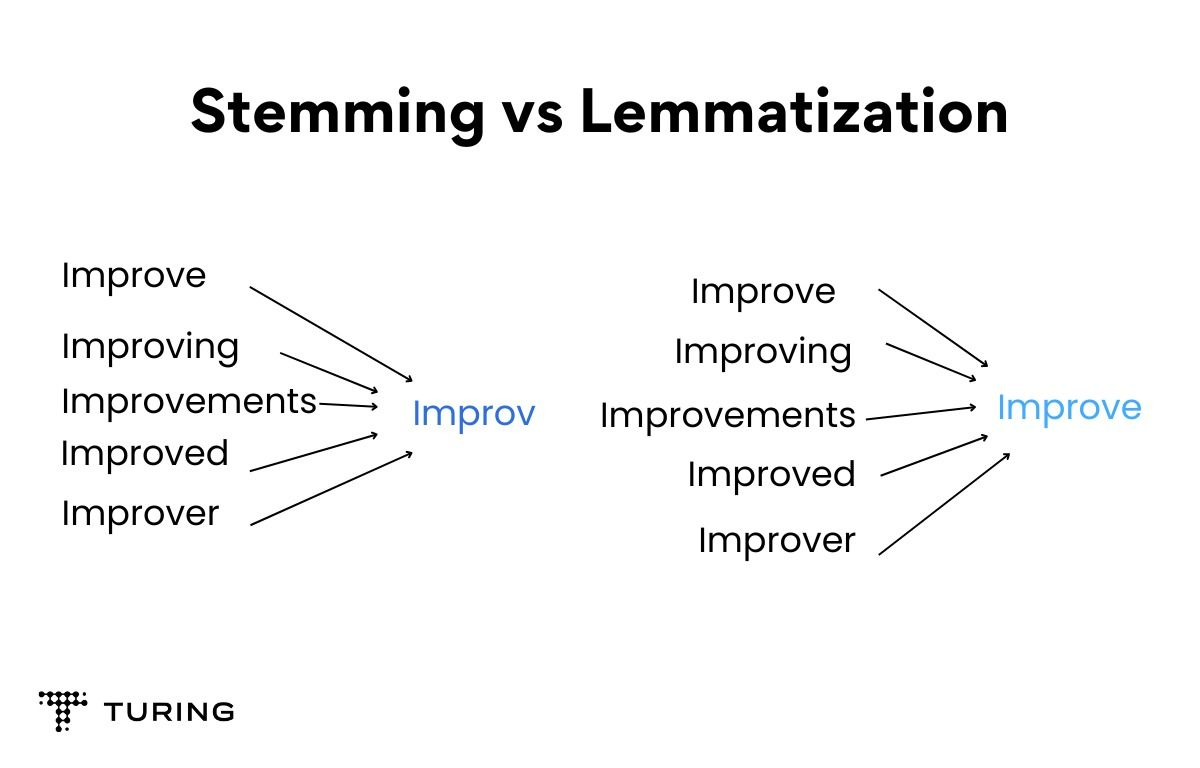

In [ ]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from nltk.corpus import wordnet as wn
import numpy as np

# Download necessary NLTK resources
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Function for lemmatizing and POS tagging
def lemmatize_and_filter_nouns(text):
    lemmatizer = nltk.WordNetLemmatizer()
    tokens = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    return [lemmatizer.lemmatize(word) for word, tag in pos_tags if tag.startswith('NN')]

# Assuming 'overviews' is a list of your text data
preprocessed_docs = [lemmatize_and_filter_nouns(doc) for doc in overviews]

# Convert preprocessed docs back to strings for CountVectorizer
docs_strings = [' '.join(doc) for doc in preprocessed_docs]

# Create a Document-Term Matrix
vectorizer = CountVectorizer()
doc_term_matrix = vectorizer.fit_transform(docs_strings)

# Prepare data for coherence score calculation
texts = [[word for word in doc.split()] for doc in docs_strings]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Loop over different numbers of topics
topics_range = range(10, 101, 10)
coherence_scores = []
perplexity_scores = []


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:

for num_topics in topics_range:
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda.fit(doc_term_matrix)

    # Compute Perplexity Score
    perplexity_scores.append(lda.perplexity(doc_term_matrix))


# Print the scores
for i, num_topics in enumerate(topics_range):
    print(f"Topics: {num_topics}, Perplexity Score: {perplexity_scores[i]}")


Topics: 10, Perplexity Score: 6643.771364712091
Topics: 20, Perplexity Score: 8115.796350718941
Topics: 30, Perplexity Score: 9388.373090947545
Topics: 40, Perplexity Score: 10439.781831046588
Topics: 50, Perplexity Score: 11443.64002374679
Topics: 60, Perplexity Score: 12422.93289979738
Topics: 70, Perplexity Score: 13242.7125008073
Topics: 80, Perplexity Score: 13842.079393832979
Topics: 90, Perplexity Score: 14592.243104637717
Topics: 100, Perplexity Score: 15116.188310061028


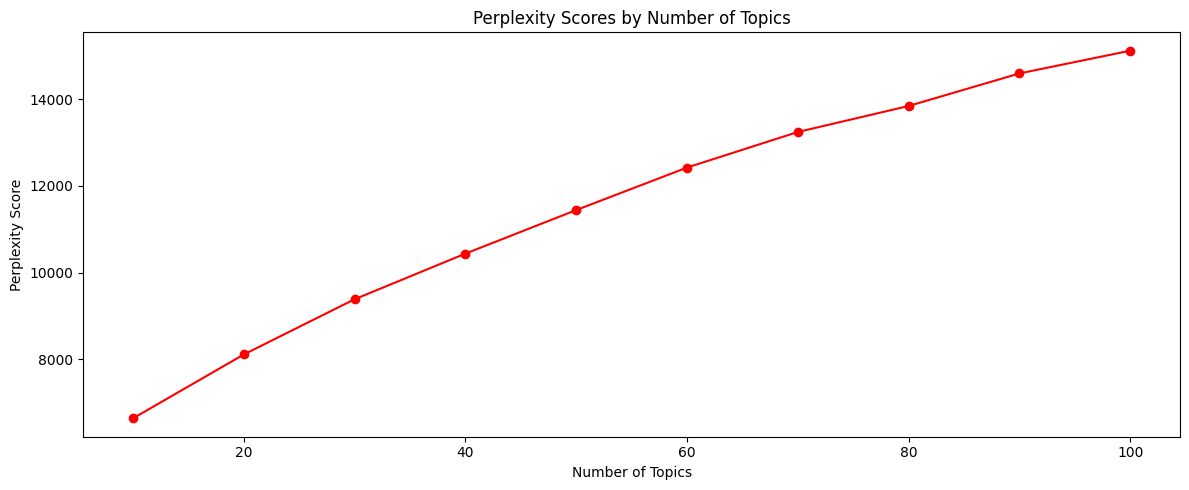

In [ ]:
import matplotlib.pyplot as plt

# Example coherence and perplexity scores for demonstration purposes
topics_range = range(10, 101, 10)

plt.figure(figsize=(12, 5))
plt.plot(topics_range, perplexity_scores, marker='o', color='r')
plt.title('Perplexity Scores by Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity Score')

plt.tight_layout()
plt.show()



#### Examining LDA outcome
- let's try with 10 topics

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(doc_term_matrix)

# Assuming 'lda' is your trained LDA model and 'vectorizer' is your CountVectorizer
feature_names = vectorizer.get_feature_names_out()
display_topics(lda, feature_names, no_top_words=10)


Topic 0:
world man time day killer life agent mission people war
Topic 1:
man love town life cop group year drug family world
Topic 2:
life man woman family love world friend new film year
Topic 3:
school world story way time friend home life crime teacher
Topic 4:
friend life year film world story computer woman way man
Topic 5:
world life agent father game city son year family team
Topic 6:
life family new father friend york war mother son girl
Topic 7:
team house home wife daughter love family brother woman father
Topic 8:
life world man war father way friend woman time year
Topic 9:
year world family film girl city friend angeles los love


#### Topic probabilities

In [ ]:
import pandas as pd
import numpy as np

def assign_topic_probabilities_to_documents(lda_model, doc_term_matrix):
    # Get the topic distribution for each document
    topic_distributions = lda_model.transform(doc_term_matrix)

    return topic_distributions

# Applying the function
document_topics_probs = assign_topic_probabilities_to_documents(lda, doc_term_matrix)

# Creating a DataFrame from the topic probabilities
topics_df = pd.DataFrame(document_topics_probs, columns=[f'Topic_{i}' for i in range(document_topics_probs.shape[1])])

# Concatenating the topic probabilities DataFrame with the original DataFrame
df = pd.concat([df, topics_df], axis=1)


#### Assign topics to original df

In [ ]:
def assign_topics_to_documents(lda_model, doc_term_matrix):
    # Get the topic distribution for each document
    topic_distributions = lda_model.transform(doc_term_matrix)

    # Assign the most dominant topic to each document
    dominant_topic = np.argmax(topic_distributions, axis=1)
    return dominant_topic

# Applying the function
document_topics = assign_topics_to_documents(lda, doc_term_matrix)

# Adding the dominant topic to the original DataFrame
df['Dominant_Topic'] = document_topics


In [ ]:
df

,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Comedy,Genre_Crime,Genre_Documentary,Genre_Drama,Genre_Family,Genre_Fantasy,Genre_Foreign,...,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Dominant_Topic
0,0,0,1,1,0,0,0,1,0,0,...,0.004546,0.004546,0.061907,0.004546,0.004546,0.062499,0.004546,0.004547,0.004546,0
1,0,1,0,0,0,0,0,1,1,0,...,0.004546,0.959085,0.004546,0.004546,0.004547,0.004546,0.004546,0.004546,0.004546,2
2,0,0,0,1,0,0,1,0,0,0,...,0.007693,0.007694,0.007693,0.007693,0.007693,0.007694,0.007694,0.930761,0.007693,8
3,1,0,0,0,1,0,1,0,0,0,...,0.233871,0.005264,0.005264,0.188249,0.005265,0.005264,0.005264,0.005264,0.541031,9
4,1,1,0,0,0,0,0,0,0,0,...,0.002942,0.002942,0.002942,0.973521,0.002943,0.002942,0.002942,0.002942,0.002942,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3829,1,0,0,0,0,0,0,0,0,0,...,0.020001,0.819971,0.020002,0.020004,0.020001,0.020005,0.020003,0.020004,0.020003,2
3830,1,1,0,0,0,0,0,0,0,0,...,0.011115,0.011115,0.011116,0.899972,0.011113,0.011113,0.011113,0.011115,0.011115,4
3831,1,0,0,0,0,0,0,0,0,0,...,0.003704,0.003704,0.003704,0.003705,0.003704,0.003704,0.003704,0.557854,0.208571,8
3832,0,0,0,1,0,0,0,0,0,0,...,0.967849,0.003573,0.003572,0.003572,0.003572,0.003572,0.003573,0.003572,0.003572,1


#### Coherence scores

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


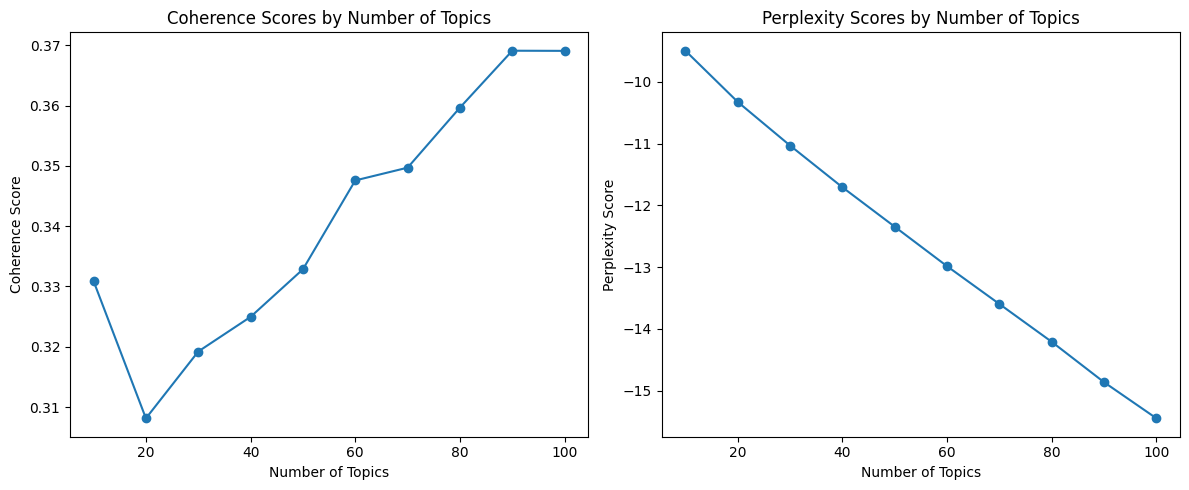

In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('wordnet')

# Function to preprocess text
def preprocess(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in gensim.utils.simple_preprocess(text) if word not in stop_words]

# Assuming 'documents' is your list of documents
processed_docs = [preprocess(doc) for doc in overviews]

# Create Dictionary and Corpus
dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

topics_range = range(10, 101, 10)
coherence_scores = []
perplexity_scores = []

for num_topics in topics_range:
    lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, random_state=42)

    # Compute Coherence Score
    coherence_model = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
    coherence_scores.append(coherence_model.get_coherence())

    # Compute Perplexity Score
    perplexity_scores.append(lda_model.log_perplexity(corpus))

# Plotting
plt.figure(figsize=(12, 5))

# Plot Coherence Score
plt.subplot(1, 2, 1)
plt.plot(topics_range, coherence_scores, marker='o')
plt.title('Coherence Scores by Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')

# Plot Perplexity Score
plt.subplot(1, 2, 2)
plt.plot(topics_range, perplexity_scores, marker='o')
plt.title('Perplexity Scores by Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity Score')

plt.tight_layout()
plt.show()
